<div id="container" style="position:relative;">
<div style="float:left"><h1> Advanced Python</h1></div>
<div style="position:relative; float:right">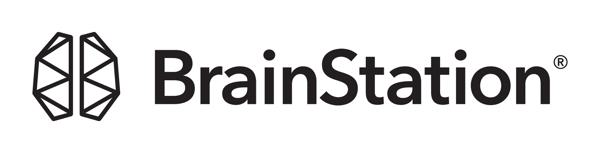
</div>
</div>

## Introduction



As you have seen so far in this bootcamp, a Python program, at its most basic, is composed of a series of *statements*, which can be simple or compound. The way in which you organize these statements has ramifications for performance, readability, and ease of modification.

In this lesson we will explore Python's two most popular *paradigms* for structuring code: **Object Oriented Programming** and **Functional Programming**, and some of advanced Python constructs to implement those paradigms.

## Object-Oriented Programming (OOP)



### Classes and Objects

Python has a range of built-in data types that we have already explored, such as `int`, `str`, and `float`. However, there are some other data types that we have come across like the Ordinary Least Squares (OLS) object from `statsmodels` and the N-dimensional array (ndarray) from Numpy. These data types have their own unique properties and are designed to handle specific types of data.
For example:


In [ ]:
my_list = [1, 2, 3, 4, 5]
print("First print: ", my_list.pop())  # <-- Why does this line work...

my_string = 'hello world'
print("Second print: ", my_string.pop())  # <-- ... but not this one?

First print:  5


AttributeError: 'str' object has no attribute 'pop'

The `AttributeError: 'str' object has no attribute 'pop'` means we are trying to use the .pop() **method** on a string **object** that is not allowed. The `pop()` method is for removing and returning an element from a *list* data type.

In the `AttributeError` text we are seeing the vocabulary of oject-oriented paradigm - *objects*, *method*. Let's familiarise ourselves with these terms using the familiar Pac-Man game.

Imagine you're playing Pac-Man, and everything in the game world is built using **objects** and **classes**.


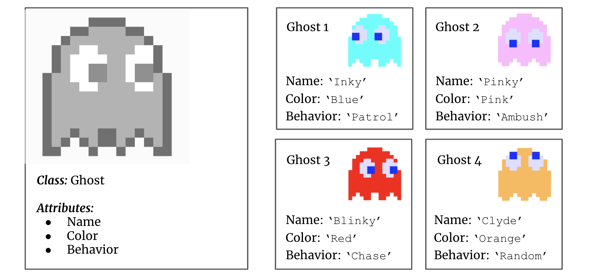

> **Classes** as the Pac-Man and Ghost Blueprints

A class is like a blueprint that outlines the characteristics and behavior of an object of that particular type. For instance, the Pac-Man class would define the universal attributes and abilities of all Pac-Man characters in the game. Similarly, the Ghost class would serve as a blueprint for all the ghost characters.

A class specifies the properties (such as name and color) that all its objects will possess. It also defines the methods (like behavior()) that these objects can employ.

> **Objects** as Pac-Man and Ghosts

In a game, individual items are specific examples of a particular class. For instance, Pac-Man and the four ghost characters - Inky, Blinky, Pinky and Clyde - are instances of a class. While these ghost characters have similar behaviors and appearances, such as wanting to chase Pac-Man, they differ in other attributes such as colors, speeds, and behaviors. Each object has its own set of properties that distinguish it from other objects in the same class.


**Object-Oriented Programming**:

Object-Oriented Programming (OOP) uses the idea of objects and classes to structure complex codebases in a modular and reusable way.

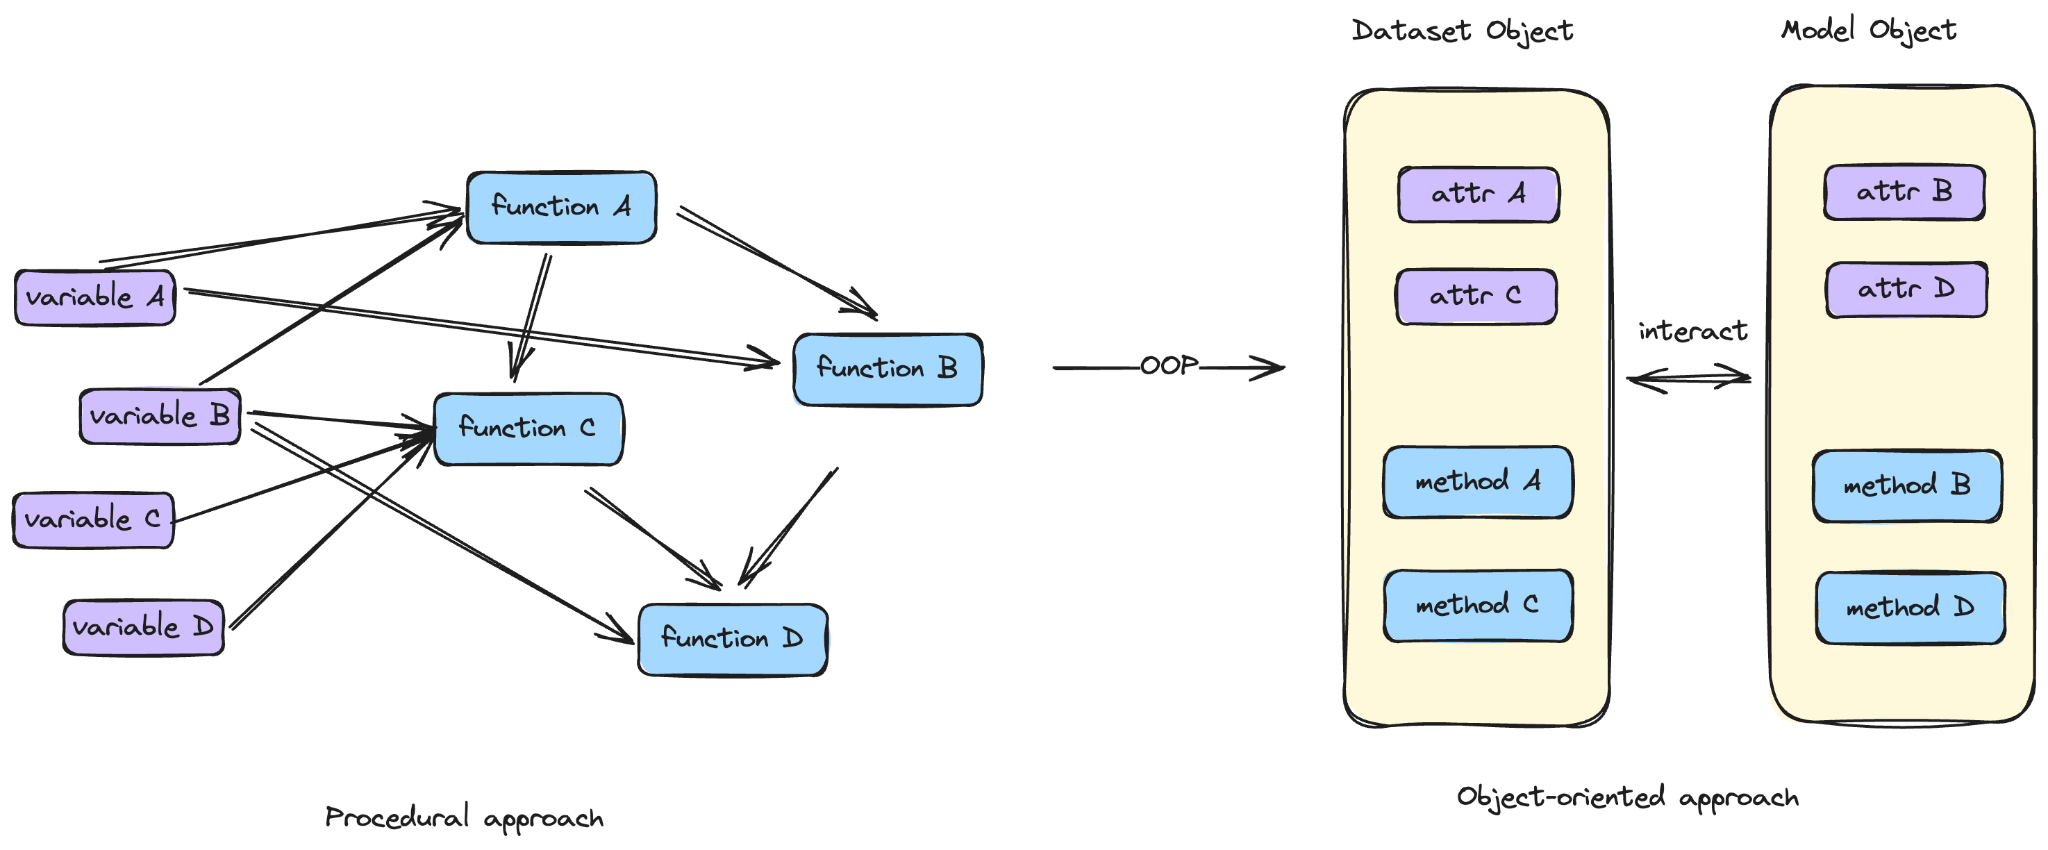

You will all be familiar with the code structure on the left. We have four different functions calling each other, and a bunch of variables that are accessed and used by one or multiple functions.

OOP groups variables and functions from our spaghetti structure above together into “objects”. Objects interact with each other by making reference to each other's properties and by calling each other’s methods. This makes the code easier to reproduce and maintain.

### Create classes and objects in Python

#### Creating a basic class

Let's create a class that represents individuals, defines common attributes and a method to get basic demographic information.

In [ ]:
# Define a person class, convention is to use capitals
class Person:
    pass

This is actually all we need to start creating instances of our `Person` class, i.e., *objects* (although they won't be very interesting).

In [ ]:
# Let's create two instances of our Person Class
p1 = Person()
p2 = Person()

One of the ways to access a object’s instance attributes as well as their values is the `vars()` function.

In [ ]:
# Accessing object attributes
print(vars(p1))
print(vars(p2))

{}
{}


At this stage, both returned empty as no **attributes** were defined. Let's add name, age, and gender attributes to our Person class when creating objects.

#### Adding initialization method

To set this up, we will need to add an **initialization** method to our class. It takes arguments and assigns them to attributes during instantiation.

In [ ]:
# Define a Person class -- V2
# Add an initialization method

class Person:
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender

This initialization method must be called `__init__` and has a very specific syntax. When a new object is made, it is initialized by calling the `__init__` method on the object. `__init__` is pronounced “dunder init”: dunder is short for “double-underscore”. Its arguments are the attributes that we'd like the Store to have when it is created. The new object is passed as self, and the arguments to the class are passed as arguments after self. You can use defaulted and keyword arguments just as with regular functions.

Let's recreate some Person object now that we can give them attributes.


In [ ]:
# person data
p1_data = {'name': 'Mr. John Bradley','age': 39, 'gender': 'Male'}
p2_data = {'name': 'Miss Florence Briggs Thayer','age': 25, 'gender': 'Female'}

# instantiate store objects
p1 = Person(**p1_data)
p2 = Person(**p2_data)

The `**` operator allows us to take a dictionary of key-value pairs and unpack it into keyword arguments in a function call.

We can use the `vars()` function again to inspect the attributes and values of the objects:

In [ ]:
print(vars(p1))
print(vars(p2))

{'name': 'Mr. John Bradley', 'age': 39, 'gender': 'Male'}
{'name': 'Miss Florence Briggs Thayer', 'age': 25, 'gender': 'Female'}


To access the individual attributes, we make use of the **dot notation**:

In [ ]:
print(p1.name)
print(p1.age)

Mr. John Bradley
39


#### Modifying attributes

Now that we can access the Item attributes, we can also modify them.

In [ ]:
p2.age = 26
print(p2.age)

26


Although this approach of modifying a particular attribute *works*, it's best practice to use a *method* for this.


#### Adding methods

In addition to attributes, classes also have **methods**. Methods (functions callable on objects) are defined just like regular functions, but can only operate on objects in its class and indented in the body of the class. (For example, lists have a method called `.append()`, OLS models have a method called `.summary()`.)

Methods always take `self` as a first parameter. This will be the object the method is being called on.

Let's add a new method to our Person class:

In [ ]:
# Define a Person class -- V3
# Add a method
class Person:
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender

    def get_info(self):
        return f"Name: {self.name}, Age: {self.age}, Gender: {self.gender}"

In [ ]:
# Recreate our Person objects
p1 = Person(**p1_data)
p2 = Person(**p2_data)

In [ ]:
# Accessing the method
print(p1.get_info())
print(p2.get_info())

Name: Mr. John Bradley, Age: 39, Gender: Male
Name: Miss Florence Briggs Thayer, Age: 25, Gender: Female


Our `.get_info()` method also takes in the self argument. (In fact, all methods will have self as their first argument.) This gives our method access to all of the attributes of the particular Store object that we call it on.

#### Special Methods

Along with `__init__`, there are many other special methods. You can see the [docs here](https://docs.python.org/3/reference/datamodel.html#special-method-names). A useful method is `__str__` which determines how we print our object, as well as `__eq__`, which determines how equality is defined. You can imagine we could use `__eq__` to easily compare basket costs.

Let's look at an example of `__str__` method. If we try to print one of our Person objects:


In [ ]:
print(p1)

This output isn't very helpful. Can we format it to look like the `get_info()` method? That's what `__str__` method is there for. Let's update our class definition one more time:

In [ ]:
# Define a Person class -- V4
# Add a special method

class Person:
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender

    def __str__(self):
        return f"Name: {self.name}, Age: {self.age}, Gender: {self.gender}"

In [ ]:
# Intentiate basket objects
p1 = Person(**p1_data)
print(p1)

p2 = Person(**p2_data)
print(p2)

Name: Mr. John Bradley, Age: 39, Gender: Male
Name: Miss Florence Briggs Thayer, Age: 25, Gender: Female


#### Inheritance

Inheritance refers to objects which are 'subtypes' of other objects. When we want to inherit from another class type, we put the class we want to inherit from (called the **superclass**) in brackets

We keep all of the attributes and methods from our superclass, but add or overwrite any we include in our new class.

In our case, we'd like to build a class of objects that inherits from the Person class, demonstrating the inheritance principle. Let's add specific attributes related to a Titanic passenger - passenger class (pclass), survival status, and the fare paid.

In [ ]:
class Passenger(Person):
    def __init__(self, name, age, gender, pclass, survived, fare):
        super().__init__(name, age, gender)  # Inheritance
        self.pclass = pclass
        self.survived = survived
        self.fare = fare

    def __str__(self):
        return f"{self.name}, {self.age}, ({self.gender}), Class: {self.pclass}, Fare: {self.fare}, Survived: {self.survived}"


In [ ]:
passenger_data = {"name": "John Doe",
                  "age": 25,
                  "gender": "Male",
                  "pclass": 1,
                  "survived": True,
                  "fare": 75.25}

passenger1 = Passenger(**passenger_data)
print(passenger1)

John Doe, 25, (Male), Class: 1, Fare: 75.25, Survived: True


**Note**: This is a simplified example. In a real application, you'd likely extract passenger data from a CSV file or database and create a list of Passenger objects.

## Functional Programming

Object-Oriented programming is a very popular way to program, but it isn't the only style available in Python. For *concurrency* and for Data Science, **Functional Programming** (FP) fits as a complementary style.

FP is useful when working with large datasets or **data pipelines** because it allows us to break down complex data processing tasks into smaller, more manageable steps. This has two distinct advantages:

- It offers traceability and predictability by using immutable functions and data structures. Creating a copy of the data when changing its state establishes a virtual paper trail of all transformations, making it easier to trace and identify issues.

- It excels at tasks that require parallel processing. The focus on immutability and avoiding *side effects* makes it easier to parallelize operations on a dataset. Functions can be applied concurrently on different parts of the data without interference.

In Unit 4, we will explore *Spark*, a data processing framework that leverages functional programming approach, and is currently the industry standard for managing big datasets.

It is important to note that this approach can result in increased memory consumption. However, Python contains several constructs to mitigate those performance considerations.

- **Iterators**: Objects that allow iterating over a collection one element at a time, improving memory efficiency.

- **Generators**: Functions that yield elements on-demand, avoiding creating entire collections at once.

- **Decorators**: Functions that modify the behavior of other functions, promoting code reusability and modularity.

Before delving into those concepts, let's review and expand our understanding of functions.

### Functions as first-class citizens

Central to to the idea of functional programming are *Functions*. **Everything in Python is an object, including functions**. You can assign them to variables, store them in data structures, and pass or return them to and from other functions (first-class functions.)

In [ ]:
# Functions are objects

def greet(msg):
    return msg + '!'

hi = greet
print(hi("Hello"))

Hello!


In [ ]:
# Functions can be stored in data structures
funcs = [hi, str.lower, str.capitalize]
for f in funcs:
  print(f, f('hey there'))

<function greet at 0x7fdbb83fb160> hey there!
<method 'lower' of 'str' objects> hey there
<method 'capitalize' of 'str' objects> Hey there


In [ ]:
# Functions can be passed to other functions
def greet(func):
    greeting = func('Hi! I am Agent Smith')
    print(greeting)

def whisper(msg):
    return msg.lower() + '!'

def yell(msg):
    return msg.upper() + '!'

greet(whisper)
greet(yell)

hi! i am agent smith!
HI! I AM AGENT SMITH!


### Lambda Function

If we only use this function once, we can use what is known as a **lambda expression**. lambda functions are a useful way of referring to a custom function without naming the function with the def expression.

In [ ]:
square = lambda x: x * x
print(square(8))

64


One of the most popular uses for lambda functions is as an argument inside sort, or filter functions.  


In [ ]:
# Sorting a list of tuples using Lambda
list1 = [('eggs', 5.25), ('honey', 9.70), ('carrots', 1.10), ('peaches', 2.45)]
list1.sort(key = lambda x: x[1])
print(list1)

[('carrots', 1.1), ('peaches', 2.45), ('eggs', 5.25), ('honey', 9.7)]


In [ ]:
# Sorting a list of dicts using Lambda
import pprint as pp
list1 = [{'make':'Ford', 'model':'Focus', 'year':2013},
         {'make':'Tesla', 'model':'X', 'year':1999},
         {'make':'Mercedes', 'model':'C350E', 'year':2008}]
list2 = sorted(list1, key = lambda x: x['year'])
pp.pprint(list2)

[{'make': 'Tesla', 'model': 'X', 'year': 1999},
 {'make': 'Mercedes', 'model': 'C350E', 'year': 2008},
 {'make': 'Ford', 'model': 'Focus', 'year': 2013}]


Lambdas can be used for conditionals as well:

In [ ]:
wordb4 = lambda s, w: s.split()[s.split().index(w)-1] if w in s else None
sentence = 'Four score and seven years ago'
print(wordb4(sentence, 'seven'))

and


Lambdas on DateTime objects:

In [ ]:
import datetime

now = datetime.datetime.now()
print(now)
year = lambda x: x.year
print(year(now))

2024-05-03 00:20:42.482905
2024


Lambdas can be passed around just like any other functions:

In [ ]:
def do_something(f, val):
    return f(val)

func = lambda x: x**3
print(func(16))
print(do_something(func, 5))

4096
125


This is probably a stretch -- you shouldn't be trying to do this much with Lambdas.   
Some things are better done in a regular function. But this shows what's possible with Lambdas.

### Iterator

Many data science tasks involve working with large datasets that won't fit into memory all at once. Using iterators allows you to process the data chunk by chunk, saving memory and resources. Libraries like pandas use iterators to process large data frames and arrays efficiently, e.g., `pd.read_csv("data.csv", chunk_size=10000)`

Let's see how iterators work. To start off, we need an object that can be iterated over, such as lists, tuple, or dictionaries.

In [ ]:
my_list = [1, 2, 3]

You obtain an iterator object from an iterable using the built-in `iter()` function:

In [ ]:
my_iterator = iter(my_list)
type(my_iterator)

list_iterator

To get the next element in the sequence, we need to repeatedly call the `next()` function on the iterator:

In [ ]:
print(next(my_iterator))  # Will output 1
print(next(my_iterator))  # Will output 2

1
2


When the iterator reaches the end of the sequence, calling `next()` again raises a `StopIteration` exception. This signals the end of the iteration, often gracefully terminating loops.

Python's for loop implicitly uses iterators. When you write:

```
for item in my_list:
     print(item)
```

The for loop automatically obtains an iterator from my_list and uses `next()` to go through the items.


We can create custom iterator classes by implementing the  special methods __iter__() and __next__(). Let's create our own number generator:


In [ ]:
class NumberGenerator:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.current = start

    def __iter__(self):
        return self

    def __next__(self):
        if self.current <= self.end:
            num = self.current
            self.current += 1
            return num
        else:
            raise StopIteration

In [ ]:
generator = NumberGenerator(1, 5)
while True:
    try:
        number = next(generator)
        print(number)
    except StopIteration:
        break  # Exit the loop when there are no more elements

1
2
3
4
5


### Generators: Lazy Evaluated Functions

A very useful style of programming is "lazy evaluation". A generator is an example of that. Generatora are special types of functions that allow you to create iterators using a functional style. Unlike regular functions, which typically compute a value and return it to the caller, generator functions return a generator iterator that *yields* a stream of data one value at a time. So, generators are also iterators.

A common interview question is to create the $n$-th number in the **Fibonacci sequence**:

$$ F_n = F_{n-1} + F_{n-2} $$

The sequence follows the rule that each number is equal to the sum of the preceding two numbers.

There are many, many ways of implementing this. Let's see how to implement it using a generator functions.

In [ ]:
def fin(n):
  """
  Generates the Fibonacci sequence up to the nth term.
  """
  a, b = 0, 1

  for i in range(n):
      yield a
      a, b = b, a + b

# Accept input from the user
n = int(input("Input the number of Fibonacci numbers you want to generate? "))

print("Here are the first",n,"Fibonacci numbers:")
print(list(fin(n)))

Input the number of Fibonacci numbers you want to generate? 6
Here are the first 6 Fibonacci numbers:
[0, 1, 1, 2, 3, 5]


### Decorators: Functions that wrap other functions

Another useful construct in Python is to use the decorator syntax to wrap one function with another function.

In [ ]:
def my_decorator(func):

    def my_func(x):
        print(f"running function: {func.__name__} now")
        output_of_func = func(x)
        print('done running')
        return output_of_func * output_of_func
    return my_func

def my_adder(x):
    return x + 1

wrapped_function = my_decorator(my_adder)
wrapped_function(5)

running function: my_adder now
done running


36

A commonly used application of decorators is to time execution of a function.

In [ ]:
from functools import wraps
from time import time

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        ts = time()
        result = f(*args, **kw)
        te = time()
        print(f"fun: {f.__name__}, args: [{args}, {kw}] took: {te-ts} sec")
        return result
    return wrap

In [ ]:
@timing
def fin(n):
  """
  Generates the Fibonacci sequence up to the nth term.
  """
  a, b = 0, 1

  for i in range(n):
      yield a
      a, b = b, a + b

print("Here are the first 6 Fibonacci numbers:")
print(list(fin(6)))


Here are the first 6 Fibonacci numbers:
fun: fin, args: [(6,), {}] took: 9.5367431640625e-07 sec
[0, 1, 1, 2, 3, 5]


### Supplementary: Recursion


Recursion allows us to loop back, and use the same function inside itself. Fibonacci is the classic candidate for recursion, we can write a second implementation of Fibonacci sequence:

In [ ]:
def fib2(x):
    if x < 2:
        return 1
    else:
        return fib2(x - 1) + fib2(x - 2)

In [ ]:
# Accept input from the user
n = int(input("Input the number of Fibonacci numbers you want to generate? "))

print("Here are the first",n,"Fibonacci numbers:")
print([0] + [fib2(i) for i in range(n-1)])

Input the number of Fibonacci numbers you want to generate? 6
Here are the first 6 Fibonacci numbers:
[0, 1, 1, 2, 3, 5]


But how efficient is this implementation from a runtime perspective? In Jupyter notebooks, we have a convenient method to measure runtime.

We can use [IPython magic function](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%timeit` to see how long a line takes to run, or `%%timeit` to see the whole cell.

In [ ]:
%%timeit
[fib2(i) for i in range(10)]

36.8 µs ± 95 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Cool, but what if we want a few more numbers:

In [ ]:
%timeit [fib2(i) for i in range(30)]

594 ms ± 25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Our performance is not great! With a bit of thinking, we can see that if we call `fib2(5)`, we have to calculate `fib2(4)` and `fib2(3)`, but `fib2(4)` calls `fib2(3)` again, and it multiplies out.

One of the key parts of recursive programming is to make sure we do not run the same function on the same value more than once.

We can cache the results! Caching just means storing the results of the work we've already done so we don't have to re-do operations.

Python has a decorator called `lru_cache`. It stands for **L**east **R**ecently **U**sed. We keep the $n$ most recently used calls (by default 128) in our cache, and return them if found, rather than running the function. This used the same dict implementation as our naive cache.

In [ ]:
from functools import lru_cache

@lru_cache()
def fib3(x):
    if x < 2:
        return 1
    else:
        return fib3(x - 1) + fib3(x - 2)

In [ ]:
%%timeit
[fib3(i) for i in range(30)]

3.12 µs ± 35.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


---

## Titanic Case Study

To see how object-oriented programming can help us structure our data science projects, we will create a data processing class and apply it on the Titanic dataset.

We will start with a base template with generic functionality that we can re-use for other projects in the future, and then create a Titanic-specific data processor.

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [ ]:
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Data Dictionary

The Titanic was a British passenger liner that sank in 1912 after colliding with an iceberg. Only 31% of passengers survived in this disaster. The goal of this notebook is to standardise a data processing workflow to prepare this dataset for modeling.

For more information see [Titanic survival prediction challenge](http://www.kaggle.com/c/titanic-gettingStarted) presented by Kaggle.


Data description:

- `Survived` - Survival (0 = No; 1 = Yes).
- `Pclass` - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- `Name` - Name
- `Sex` - Gender
- `Age` - Age
- `Siblings/Spouses Aboard` - Number of siblings or Spouses the passenger was traveling with
- `Parents/Children Aboard` - Number of Parents or Children the passenger was traveling with
- `Fare` - Passenger Fare


### A starter template for data processing

As part of your Data Analysis Toolkit, it is convenient to have various generic templates saved that you can refer back to when starting a new project. They can help kick-start your code implementations and help you think through the analysis steps of a specific project.

Below, we have created a generic data processing class template. It contains an `__init__` method that takes a file path as input, a simple `load_data()` method that reads in the data, and a series of placeholders for data processing steps that would be filled in based on the specific requirements of a dataset.

In [ ]:
class BaseDataProcessor():

    # initialise with just a filepath
    def __init__(self, data_path):
        self.data_path = data_path
        self.data = None  # Placeholder for processed data


    # placeholders for various data processing steps

    def load_data(self):
        self.data = pd.read_csv(self.data_path)
        return self.data

    def clean_data(self):
        pass

    def preprocess_data(self):
        pass

    def load_and_process_data(self):
        pass

    def save_processed_data(self):
        pass

### Inheriting Functionality

This is a good starting point. We have some basic structure that our titanic-specific data processor can inherit functionality from.

Let's start building our titanic-specific processor class. For now, let's just inherit the functionality from our base template, and not add anything extra.

In [ ]:
class TitanicPassengerProcessor(BaseDataProcessor):

    pass

Our titanic-specific class has no extra functionality beyond what it inherited from the BaseDataProcessor class.

The Base class did have its `__init__` method defined, so we should be able to initialize our processor.

In [ ]:
processor = TitanicPassengerProcessor('data/titanic.csv')

In [ ]:
processor.data_path

'data/titanic.csv'

Notice we were able to 'instantiate' a copy of our class, and that instance now has an attribute defined: self.data_path.

The second method we inherited was `load_data()`, which should already be functional:

In [ ]:
processor.load_data()[:5]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Exercise 1: Customising the load_data() method

- Edit the `load_data()` method below so that it takes an extra, optional input: `expected_columns`, which is a list of column names we are interested in.
- Add code to the method so that it checks that all the expected columns are accounted for in the dataset, and only returns those columns as output. If no expected_columns are specified, return the whole dataset instead.
- If some expected columns can not be found, the method should raise an error message.

In [ ]:
class TitanicPassengerProcessor(BaseDataProcessor):

    # No need to redefine __init__ : we've inherited this from BaseDataProcessor

    def load_data(self):

        self.data = pd.read_csv(self.data_path)

        # Your code goes here



In [ ]:
# Test your code
processor = TitanicPassengerProcessor('data/titanic.csv')
expected_cols = ['Survived', 'Age']
processor.load_data(expected_cols)

### Solution:

In [ ]:
# YOUR CODE GOES HERE

### Building out our workflow

Let's fill in the next few methods to build our workflow:

In [ ]:
class TitanicPassengerProcessor(BaseDataProcessor):

    # No need to redefine __init__ : we've inherited this from BaseDataProcessor

    # UPDATE with the solution of Exercise 1
    def load_data(self):
        self.data = pd.read_csv(self.data_path)
        return self.data


    def clean_data(self):
        pass


    def preprocess_data(self):
        pass


    def load_and_process_data(self):
        self.load_data()
        self.data = self.clean_data()
        self.data = self.preprocess_data()
        return self.data


    def save_processed_data(self, output_file="processed_titanic.csv"):
        if self.data is None:
            raise ValueError("No data has been processed yet. Load and process data first.")
        self.data.to_csv(output_file, index=False)


We have filled in the `load_and_process_data` method, which simply triggers the other methods in the right order, and the `save_processed_data` method, which exports our processed dataset as a csv file. It has an extra safeguard built in: if we try and save the data without having loading anything in first, we get a `ValueError`.

### Exercise 2

Continue building the `TitanicPassengerProcessor` above:
- fill in the `clean_data` method to:
    - handle missing values in the Age column by filling in the average age
    - handle missing values in the Pclass column by filling in the most common Pclass
- fill in the `preprocess_data`method to:
    - Drop the `Name` column
    - create dummy variables for the `Sex` and `Pclass` columns

### Solution

In [1]:
# YOUR CODE GOES HERE

### Building extra functionality

Our Titanic data processor now captures a full, albeit fairly simple, data pre-processing workflow.

Let's focus now on some extra functionality to allow the user to interact with our data processor. Specifically, we will add two special methods: `__str__` and `__iter__`. The first determines what should be returned if the user asks for a `print()` of our processor. The second determines how our class should be treated as an iterable object.

```
def __str__(self):
        data_shape = self.data.shape if self.data is not None else "Data not yet loaded"

        return f"""TitanicPassengerProcessor(
                    data_path={self.data_path},
                    data_shape={data_shape}
                )"""
```

The `__str__` method returns a string with two pieces of information when called: the file_path that was used, and the shape of the dataset. If no dataset has been loaded yet, it prints a warning message instead.

```
    def __iter__(self):
        yield from (
            self.data.iterrows()
        )  
```

The `__iter__` method determines what happens when we call `for x in processor: ...`

We will use a generator to return one row of the dataset at a time, effectively making a passenger list. This would allow us to make model predictions on each row in the dataset, one at a time.

In [ ]:
class TitanicPassengerProcessor(BaseDataProcessor):

    # No need to redefine __init__ : we've inherited this from BaseDataProcessor


    # UPDATE with the solution to Exercise 1
    def load_data(self):
        self.data = pd.read_csv(self.data_path)
        return self.data

    # UPDATE with the solution to Exercise 2
    def clean_data(self):
      pass

    # UPDATE with the solution to Exercise 2
    def preprocess_data(self):
      passenger_data

    def load_and_process_data(self):
        self.load_data()
        self.data = self.clean_data()
        self.data = self.preprocess_data()
        return self.data


    def save_processed_data(self, output_file="processed_titanic.csv"):
        if self.data is None:
            raise ValueError("No data has been processed yet. Load and process data first.")
        self.data.to_csv(output_file, index=False)


    def __iter__(self):
        yield from (
            self.data.iterrows()
        )


    def __str__(self):
            data_shape = self.data.shape if self.data is not None else "Data not yet loaded"

            return f"""TitanicPassengerProcessor(
                        data_path={self.data_path},
                        data_shape={data_shape}
                    )"""


Let's test the `__str__` method:

In [ ]:
processor = TitanicPassengerProcessor('data/titanic.csv')
processor.load_and_process_data();

In [ ]:
print(processor)

TitanicPassengerProcessor(
                        data_path=data/titanic.csv,
                        data_shape=(887, 8)
                    )


And the `__iter__` method. Remember that defining this as a generator means we can use the `next()` function to access each row of our dataset one at a time.

In [ ]:
passenger_list = iter(processor)

In [ ]:
next(passenger_list)

(0,
 Survived                    0.00
 Age                        22.00
 Siblings/Spouses Aboard     1.00
 Parents/Children Aboard     0.00
 Fare                        7.25
 Sex_male                    1.00
 Pclass_2                    0.00
 Pclass_3                    1.00
 Name: 0, dtype: float64)

<div id="container" style="position:relative;">
<div style="position:relative; float:right">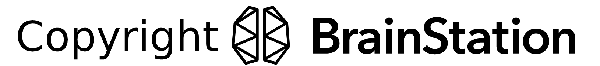
</div>
</div>